In [34]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [35]:
def plot_velo_pres_sol(
    p_sol: npt.NDArray[np.float64],
    x_p: npt.NDArray[np.float64],
    y_p: npt.NDArray[np.float64],
    u_x: npt.NDArray[np.float64],
    u_y: npt.NDArray[np.float64],
    x_u: npt.NDArray[np.float64],
    y_u: npt.NDArray[np.float64],
):
    fig, ax = plt.subplots()  # type: ignore
    triang = tri.Triangulation(x_p, y_p)
    # ax.triplot(triang, "bo-", lw=0.2)
    # plot only triangles with sidelength smaller some max_radius
    max_radius = 0.001
    triangles = triang.triangles

    # Mask off unwanted triangles.
    xtri = x_p[triangles] - np.roll(x_p[triangles], 1, axis=1)
    ytri = y_p[triangles] - np.roll(y_p[triangles], 1, axis=1)
    maxi = np.max(np.sqrt(xtri**2 + ytri**2), axis=1)
    triang.set_mask(maxi > max_radius)

    # ax.triplot(triang, color="indigo", lw=2.6)
    ax.tricontour(triang, p_sol, levels=25, linewidths=0.5, colors="k")  # type: ignore
    c_data = ax.tricontourf(triang, p_sol, levels=50, cmap="RdBu_r")  # type: ignore
    fig.colorbar(c_data)  # type: ignore
    # ax.plot(x_p, y_p, "ko")
    arrow_lengths = np.sqrt(u_x**2 + u_y**2)
    pc = ax.quiver(  # type: ignore
        x_u[::10],
        y_u[::10],
        u_x[::10],
        u_y[::10],
        # arrow_lengths,
        # scale=0.0025,
        # scale_units="width",
        # units="width",
        # width=0.0025,
        # headlength=3,
        # headaxislength=3,
        cmap="Greys",
    )
    return fig, ax

In [36]:
# pressure_data_elena = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/nozzle_-5_0_10_11-22_12-02/p_hr_-5_10.csv")
# velocity_data_elena = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/nozzle_-5_0_10_11-22_12-02/u_hr_-5_10.csv")
pressure_data_tepem = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/wave_nozzled_n10/Wffast/p_hr.csv", delimiter=",")
velocity_data_tepem = np.loadtxt("/Users/erikweilandt/Documents/university/master_thesis/tepem/results/wave_nozzled_n10/Wffast/u_hr.csv", delimiter=",")


In [37]:
# # assign pressure solution
# x_p_tepem = pressure_data_tepem[:,0]
# y_p_tepem = pressure_data_tepem[:,1]
# p_sol_tepem = pressure_data_tepem[:,3]

# # assign velocity solution
# x_u_tepem = velocity_data_tepem[:,0]
# y_u_tepem = velocity_data_tepem[:,1]
# u_x_tepem = velocity_data_tepem[:,3]
# u_y_tepem = velocity_data_tepem[:,4]

In [38]:
# # assign pressure solution
# x_p_tepem = pressure_data_tepem[:,0]
# y_p_tepem = pressure_data_tepem[:,1]
# p_sol_tepem = pressure_data_tepem[:,3]

# # assign velocity solution
# x_u_tepem = velocity_data_tepem[:,0]
# y_u_tepem = velocity_data_tepem[:,1]
# u_x_tepem = velocity_data_tepem[:,3]
# u_y_tepem = velocity_data_tepem[:,4]

In [39]:
# assign pressure solution
x_p_tepem = pressure_data_tepem[:,0]
y_p_tepem = pressure_data_tepem[:,1]
p_sol_tepem = pressure_data_tepem[:,2]

# assign velocity solution
x_u_tepem = velocity_data_tepem[:,0]
y_u_tepem = velocity_data_tepem[:,1]
u_x_tepem = velocity_data_tepem[:,2]
u_y_tepem = velocity_data_tepem[:,3]

In [40]:
# # assign pressure solution
# x_p_elena = pressure_data_elena[:,0]
# y_p_elena = pressure_data_elena[:,1]
# p_sol_elena = pressure_data_elena[:,3]

# # assign velocity solution
# x_u_elena = velocity_data_elena[:,0]
# y_u_elena = velocity_data_elena[:,1]
# u_x_elena = velocity_data_elena[:,3]
# u_y_elena = velocity_data_elena[:,4]

In [41]:
# assign pressure solution
# x_p_elena = pressure_data_elena[:,1]
# y_p_elena = pressure_data_elena[:,2]
# p_sol_elena = pressure_data_elena[:,0]

# # assign velocity solution
# x_u_elena = velocity_data_elena[:,2]
# y_u_elena = velocity_data_elena[:,3]
# u_x_elena = velocity_data_elena[:,0]
# u_y_elena = velocity_data_elena[:,1]

(<Figure size 640x480 with 2 Axes>, <Axes: >)

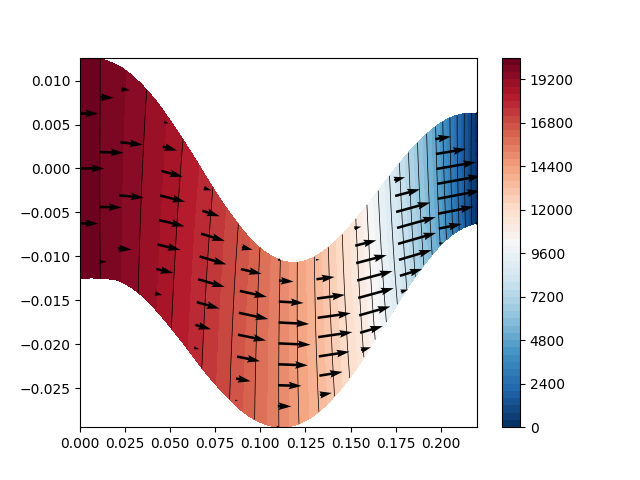

In [42]:
%matplotlib widget
# %matplotlib inline
plot_velo_pres_sol(p_sol_tepem, x_p_tepem, y_p_tepem, u_x_tepem, u_y_tepem, x_u_tepem, y_u_tepem)

In [43]:
# plot_velo_pres_sol(p_sol_elena, x_p_elena, y_p_elena, u_x_elena, u_y_elena, x_u_elena, y_u_elena)

In [44]:
# get initial velocity profile
velocity_data_tepem[velocity_data_tepem[:,0] <= 1e-9][:,3], velocity_data_tepem[velocity_data_tepem[:,0] <= 1e-9][:,1]


(array([ 0.00000000e+00, -4.53355596e-16,  1.27123048e-14,  3.05646352e-14,
         4.67016014e-14,  5.68804841e-14,  5.86704656e-14,  5.11287990e-14,
         3.45005609e-14,  9.94198622e-15, -2.07326129e-14, -5.52803463e-14,
        -9.12356612e-14, -1.26092676e-13, -1.57463927e-13, -1.83215541e-13,
        -2.01578813e-13, -2.11238211e-13, -2.11395793e-13, -2.01812041e-13,
        -1.82823115e-13, -1.55334521e-13, -1.20791195e-13, -8.11240117e-14,
        -3.86726981e-14,  3.91482475e-15,  4.38066891e-14,  7.81349093e-14,
         1.04166793e-13,  1.19499937e-13,  1.22280802e-13,  1.11446877e-13,
         8.69924199e-14,  5.02577865e-14,  4.24233720e-15, -4.60590685e-14,
        -9.32959974e-14, -1.27378784e-13, -1.35071289e-13, -9.95600750e-14,
        -6.52489472e-25]),
 array([-0.0125  , -0.011875, -0.01125 , -0.010625, -0.01    , -0.009375,
        -0.00875 , -0.008125, -0.0075  , -0.006875, -0.00625 , -0.005625,
        -0.005   , -0.004375, -0.00375 , -0.003125, -0.0025  , -0